Support Vector Regression: [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

 Standardization: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform) 

In [7]:
# Import the libraries (numpy, pandas, pyplot)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data from Position_Salaries.csv file into a DataFrame
df = pd.read_csv("Position_Salaries.csv")

In [8]:
# Define the feature and target values
X = df.iloc[:, 1:2].values
y = df["Salary"].values

In [9]:
# Before feature scaling
for x, y_ in zip(X, y):
    print(x, y_)

[1] 45000
[2] 50000
[3] 60000
[4] 80000
[5] 110000
[6] 150000
[7] 200000
[8] 300000
[9] 500000
[10] 1000000


In [10]:
# FEATURE SCALING

# import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# create instances of StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

# transform X using fit_transform method of sc_x
X = sc_x.fit_transform(X)

# transform y using fit_transform method of sc_y 
# param: 2D array y
y = sc_y.fit_transform(y.reshape(-1, 1))

In [11]:
# After feature scaling
for x, y_ in zip(X, y):
    print(x, y_)

[-1.5666989] [-0.72004253]
[-1.21854359] [-0.70243757]
[-0.87038828] [-0.66722767]
[-0.52223297] [-0.59680786]
[-0.17407766] [-0.49117815]
[0.17407766] [-0.35033854]
[0.52223297] [-0.17428902]
[0.87038828] [0.17781001]
[1.21854359] [0.88200808]
[1.5666989] [2.64250325]


In [12]:
# Build a SVR model on the whole dataset

# import SVR from sklearn
from sklearn.svm import SVR

# train the SVR model
regressor = SVR()

# fit
regressor.fit(X, y)

c:\Users\Waffl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

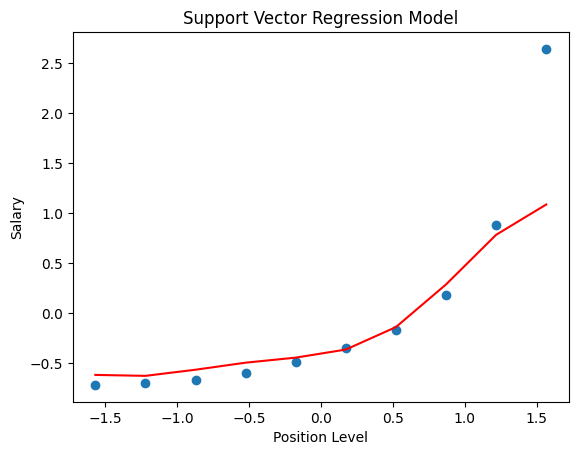

In [13]:
# Visualise the SVR results on the whole dataset

# draw scatter plots of the whole dataset
#   x-axis: Position Level
#   y-axis: Salary
plt.scatter(X, y)

# Draw the Regression line
#   x: X
#   y: predicted results of the regressor on X
plt.plot(X, regressor.predict(X), color="red")
plt.title("Support Vector Regression Model")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [14]:
# Predict Salary from 5.5 Years Experience
# param: transformed 2d array (sc_x.transform)
y_pred = regressor.predict(sc_x.transform([[5.5]])).reshape(-1, 1)

# convert y_pred to an unscaled value using sc_y.inverse_transform
# param: 2d array scaled y_pred
y_pred = sc_y.inverse_transform(y_pred)

y_pred[0][0]

131106.77303274476